
$\mu = \begin{bmatrix}0 \\ 0 \end{bmatrix}$ $\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$


In [3]:
import numpy as np
import matplotlib.pyplot as plt

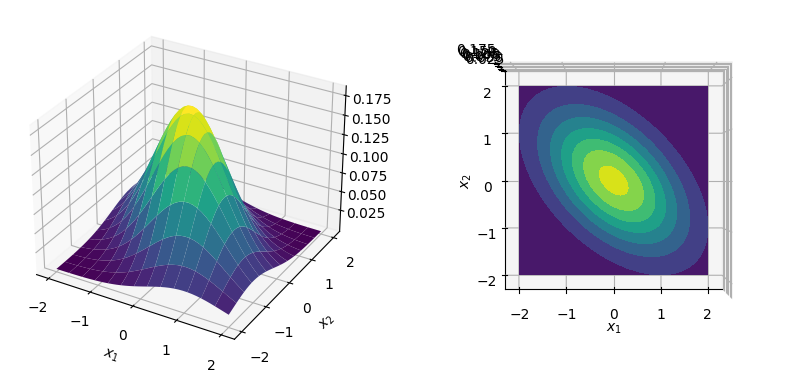

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
#ax1.view_init(55,-70)
#ax1.set_xticks([])
#ax1.set_yticks([])
#ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.grid()
plt.show()

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  3.,  2.,  3.,  5., 11.,
         6.,  7.,  8.,  8.,  7., 17.,  4., 10., 15.,  6., 10., 14., 16.,
        20., 27., 24., 22., 21., 23., 29., 20., 30., 25., 16., 22., 24.,
        38., 32., 24., 23., 25., 29., 31., 29., 18., 27., 20., 14., 26.,
        15., 14., 16., 19., 14., 11., 14., 14.,  8., 10.,  5.,  7.,  3.,
         4.,  9.,  5.,  5.,  2.,  4.,  4.,  0.,  3.,  1.,  1.,  1.,  1.,
         0.,  1.,  1.,  1.,  0.,  2.,  2.,  0.,  1.]),
 array([-3.58668087, -3.52000591, -3.45333094, -3.38665598, -3.31998101,
        -3.25330605, -3.18663108, -3.11995611, -3.05328115, -2.98660618,
        -2.91993122, -2.85325625, -2.78658129, -2.71990632, -2.65323136,
        -2.58655639, -2.51988143, -2.45320646, -2.38653149, -2.31985653,
        -2.25318156, -2.1865066 , -2.11983163, -2.05315667, -1.9864817 ,
        -1.91980674, -1.85313177, -1.7864568 , -1.71978184, -1.653106

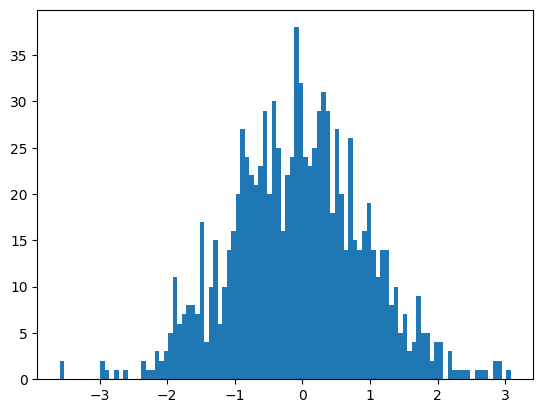

In [19]:
from scipy.stats import norm
r = norm.rvs(size=1000)
plt.hist(r, bins=100)